# Homework 3: Unsupervised Learning

Due Wednesday 11/24 at 11:59 pm EST

In this notebook, we will be applying unsupervised learning approaches to a problem in computational biology. Specifically, we will be analyzing single-cell genomic sequencing data. Single-cell genomics is a set of revolutionary new technologies which can profile the genome of a specimen (tissue, blood, etc.) at the resolution of individual cells. This increased granularity can help capture intercellular heterogeneity, key to better understanding and treating complex genetic diseases such as cancer and Alzheimer's. 

<img src="https://cdn.10xgenomics.com/image/upload/v1574196658/blog/singlecell-v.-bulk-image.png" width="800px"/>

<center>Source: 10xgenomics.com/blog/single-cell-rna-seq-an-introductory-overview-and-tools-for-getting-started</center>

A common challenge of genomic datasets is their high-dimensionality: a single observation (a cell, in the case of single-cell data) may have tens of thousands of gene expression features. Fortunately, biology offers a lot of structure - different genes work together in pathways and are co-regulated by gene regulatory networks. Unsupervised learning is widely used to discover this intrinsic structure and prepare the data for further analysis.

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Dataset: single-cell RNASeq of mouse brain cells

We will be working with a single-cell RNASeq dataset of mouse brain cells. In the following gene expression matrix, each row represents a cell and each column represents a gene. Each entry in the matrix is a normalized gene expression count - a higher value means that the gene is expressed more in that cell. The dataset has been pre-processed using various quality control and normalization methods for single-cell data. 

Data source: https://chanzuckerberg.github.io/scRNA-python-workshop/preprocessing/00-tabula-muris.html

In [156]:
cell_gene_counts_df = pd.read_csv('data/mouse_brain_cells_gene_counts.csv', index_col='cell')
cell_gene_counts_df

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610009B14Rik,0610009B22Rik,0610009D07Rik,...,Zwint,Zxda,Zxdb,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6
cell,,,,,,,,,,,,,,,,,,,,,
A1.B003290.3_38_F.1.1,-0.08093,0.7856,1.334,-0.2727,-0.4153,-0.8310,-0.4692,-0.03146,-0.6035,-1.021000,...,-0.7227,-0.2145,-0.1927,-0.4163,-0.5923,-0.5913,-0.553,-0.5654,-0.04385,1.567
A1.B003728.3_56_F.1.1,-0.08093,-1.4840,-0.576,-0.2727,-0.4153,1.8350,-0.4692,-0.03146,-0.6035,-1.021000,...,-0.7227,-0.2145,-0.1927,-0.4163,-0.5923,-0.5913,-0.553,-0.5654,-0.04385,-0.681
A1.MAA000560.3_10_M.1.1,-0.08093,0.6300,-0.576,-0.2727,-0.4153,-0.2084,-0.4692,-0.03146,-0.6035,1.253000,...,1.3150,-0.2145,-0.1927,-0.4163,-0.5923,-0.5913,2.072,-0.5654,-0.04385,1.260
A1.MAA000564.3_10_M.1.1,-0.08093,0.3809,1.782,-0.2727,-0.4153,1.0300,-0.4692,-0.03146,1.2640,-1.021000,...,-0.7227,-0.2145,-0.1927,-0.4163,-0.5923,2.3900,-0.553,0.1697,-0.04385,-0.681
A1.MAA000923.3_9_M.1.1,-0.08093,0.5654,-0.576,-0.2727,-0.4153,-0.8310,-0.4692,-0.03146,-0.6035,-1.021000,...,-0.7227,-0.2145,-0.1927,-0.4163,2.3180,-0.5913,-0.553,-0.5654,-0.04385,-0.681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E2.MAA000902.3_11_M.1.1,14.98400,1.1550,-0.576,-0.2727,-0.4153,0.7530,-0.4692,-0.03146,-0.6035,-1.021000,...,1.4260,-0.2145,-0.1927,-0.4163,-0.5923,-0.5913,-0.553,-0.5654,-0.04385,1.728
E2.MAA000926.3_9_M.1.1,-0.08093,-1.4840,-0.576,-0.2727,-0.4153,1.4720,-0.4692,-0.03146,1.8120,1.079000,...,-0.7227,-0.2145,-0.1927,-0.4163,0.2422,-0.5913,-0.553,1.6060,-0.04385,-0.681
E2.MAA000932.3_11_M.1.1,-0.08093,0.5703,-0.576,-0.2727,-0.4153,-0.8310,-0.4692,-0.03146,-0.6035,-0.003473,...,-0.7227,-0.2145,-0.1927,-0.4163,-0.5923,-0.5913,-0.553,-0.5654,-0.04385,2.074


Note the dimensionality - we have 1000 cells (observations) and 18,585 genes (features)!

We are also provided a metadata file with annotations for each cell (e.g. cell type, subtissue, mouse sex, etc.)

In [157]:
cell_metadata_df = pd.read_csv('data/mouse_brain_cells_metadata.csv')
cell_metadata_df

,cell,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode,n_genes,n_counts
0,A1.B003290.3_38_F.1.1,astrocyte,Striatum,F,3_38_F,B003290,3359,390075.0
1,A1.B003728.3_56_F.1.1,astrocyte,Striatum,F,3_56_F,B003728,1718,776436.0
2,A1.MAA000560.3_10_M.1.1,oligodendrocyte,Cortex,M,3_10_M,MAA000560,3910,1616084.0
3,A1.MAA000564.3_10_M.1.1,endothelial cell,Striatum,M,3_10_M,MAA000564,4352,360004.0
4,A1.MAA000923.3_9_M.1.1,astrocyte,Hippocampus,M,3_9_M,MAA000923,2248,290282.0
...,...,...,...,...,...,...,...,...
995,E2.MAA000902.3_11_M.1.1,astrocyte,Striatum,M,3_11_M,MAA000902,3026,3134463.0
996,E2.MAA000926.3_9_M.1.1,oligodendrocyte,Cortex,M,3_9_M,MAA000926,3085,744301.0
997,E2.MAA000932.3_11_M.1.1,endothelial cell,Hippocampus,M,3_11_M,MAA000932,2277,519257.0
998,E2.MAA000944.3_9_M.1.1,oligodendrocyte,Cortex,M,3_9_M,MAA000944,3234,1437895.0


Different cell types

In [158]:
cell_metadata_df['cell_ontology_class'].value_counts()

oligodendrocyte                   385
endothelial cell                  264
astrocyte                         135
neuron                             94
brain pericyte                     58
oligodendrocyte precursor cell     54
Bergmann glial cell                10
Name: cell_ontology_class, dtype: int64

Different subtissue types (parts of the brain)

In [159]:
cell_metadata_df['subtissue'].value_counts()

Cortex         364
Hippocampus    273
Striatum       220
Cerebellum     143
Name: subtissue, dtype: int64

In [160]:
cell_metadata_df['mouse.id'].value_counts()

3_10_M    273
3_9_M     226
3_38_F    178
3_8_M     171
3_11_M     72
3_39_F     57
3_56_F     23
Name: mouse.id, dtype: int64

Our goal in this exercise is to use dimensionality reduction and clustering to visualize and better understand the high-dimensional gene expression matrix. We will use the following pipeline, which is common in single-cell analysis:
1. Use PCA to project the gene expression matrix to a lower-dimensional linear subspace.
2. Cluster the data using K-means on the first 20 principal components.
3. Use t-SNE to project the first 20 principal components onto two dimensions. Visualize the points and color by their clusters from (2).

## Part 1: PCA

**Perform PCA and project the gene expression matrix onto its first 50 principal components. You may use `sklearn.decomposition.PCA`.**

In [161]:
pca = PCA(n_components=50)
principalComponents = pca.fit_transform(cell_gene_counts_df)
principalDf = pd.DataFrame(data = principalComponents)
principalDf.head()



,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,15.353967,22.551441,28.909568,18.160745,-63.669873,63.397364,22.120374,193.168096,5.079857,-12.085814,...,2.196239,-2.207076,-14.977023,-1.987449,-6.432946,-2.861034,2.061636,5.930570,-13.525158,8.092821
1,-19.092789,-3.011189,37.073015,-7.781964,-0.324304,-5.520997,1.450257,-0.053576,-2.177440,3.883089,...,0.165274,-0.987162,-0.754920,-1.464683,-0.120636,-1.773547,-0.148648,0.441091,0.362698,0.425442
2,1.624026,-26.093832,-8.735882,1.431624,3.908803,-0.872088,-2.047059,2.420199,3.514799,3.970432,...,-1.109091,0.015936,-0.220564,0.441845,-0.401547,0.295325,-1.134946,1.032242,0.400107,1.003436
3,-15.469770,37.906454,-37.408305,5.952024,-10.229878,4.293262,15.286237,-4.262438,-6.747907,6.365782,...,-2.976964,5.636260,0.078097,-4.986830,4.502339,1.966428,1.071005,3.545931,-3.738668,-4.632008
4,-15.223271,-2.999145,38.531674,-6.379690,-6.113619,-4.637018,5.044909,-2.089756,-6.841571,3.252655,...,1.259593,0.263747,2.783275,-2.231646,1.552231,-0.267855,1.868957,-1.554879,0.652232,1.336284


**Plot the cumulative proportion of variance explained as a function of the number of principal components. How much of the total variance in the dataset is explained by the first 20 principal components?**

Text(0, 0.5, '% of variance explained')

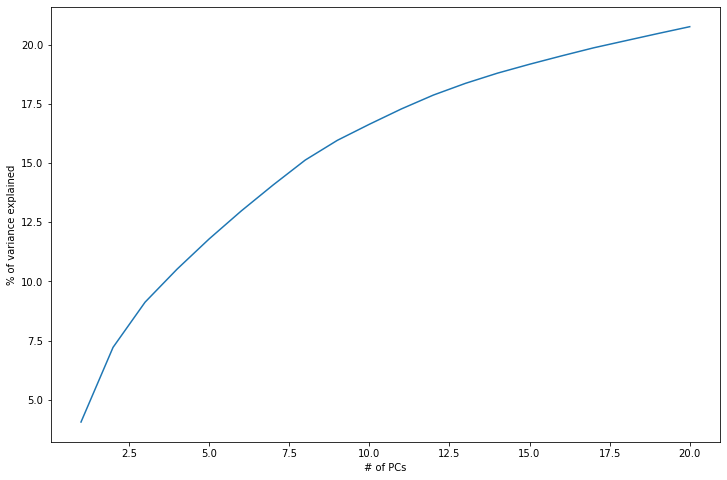

In [162]:
fig = plt.figure(figsize=(12,8))
top_20_pca_var = pca.explained_variance_ratio_[:20]
ax = fig.add_subplot(1,1,1)
plt.plot(np.arange(1,21), top_20_pca_var.cumsum()*100)
ax.set_xlabel("# of PCs")
ax.set_ylabel("% of variance explained")

#A little over 20% of the data is explained by the first 20 components 

**For the first principal component, report the top 10 loadings (weights) and their corresponding gene names.** In other words, which 10 genes are weighted the most in the first principal component?

In [163]:


weights = pca.components_
first_component = abs(weights[0])
ind = np.argpartition(first_component, -10)[-10:]

col_names = cell_gene_counts_df.columns[ind]
col_names
print(col_names)
#'Erc2', 'Cpne5', 'Hpca', 'Nrsn2', 'Camkv', 'Nsg2', 'Rasgef1a', 'Kcnj4',
#       'Ptpn5', 'St8sia3'

Index(['Erc2', 'Cpne5', 'Hpca', 'Nrsn2', 'Camkv', 'Nsg2', 'Rasgef1a', 'Kcnj4',
       'Ptpn5', 'St8sia3'],
      dtype='object')


**Plot the projection of the data onto the first two principal components using a scatter plot.**

Text(0.5, 1.0, 'First two PCAs for gene expression data')

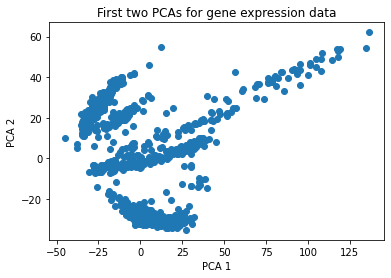

In [165]:

plt.scatter(x=principalDf[0], y=principalDf[1])
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title('First two PCAs for gene expression data')


**Now, use a small multiple of four scatter plots to make the same plot as above, but colored by four annotations in the metadata: cell_ontology_class, subtissue, mouse.sex, mouse.id. Include a legend for the labels.** For example, one of the plots should have points projected onto PC 1 and PC 2, colored by their cell_ontology_class.

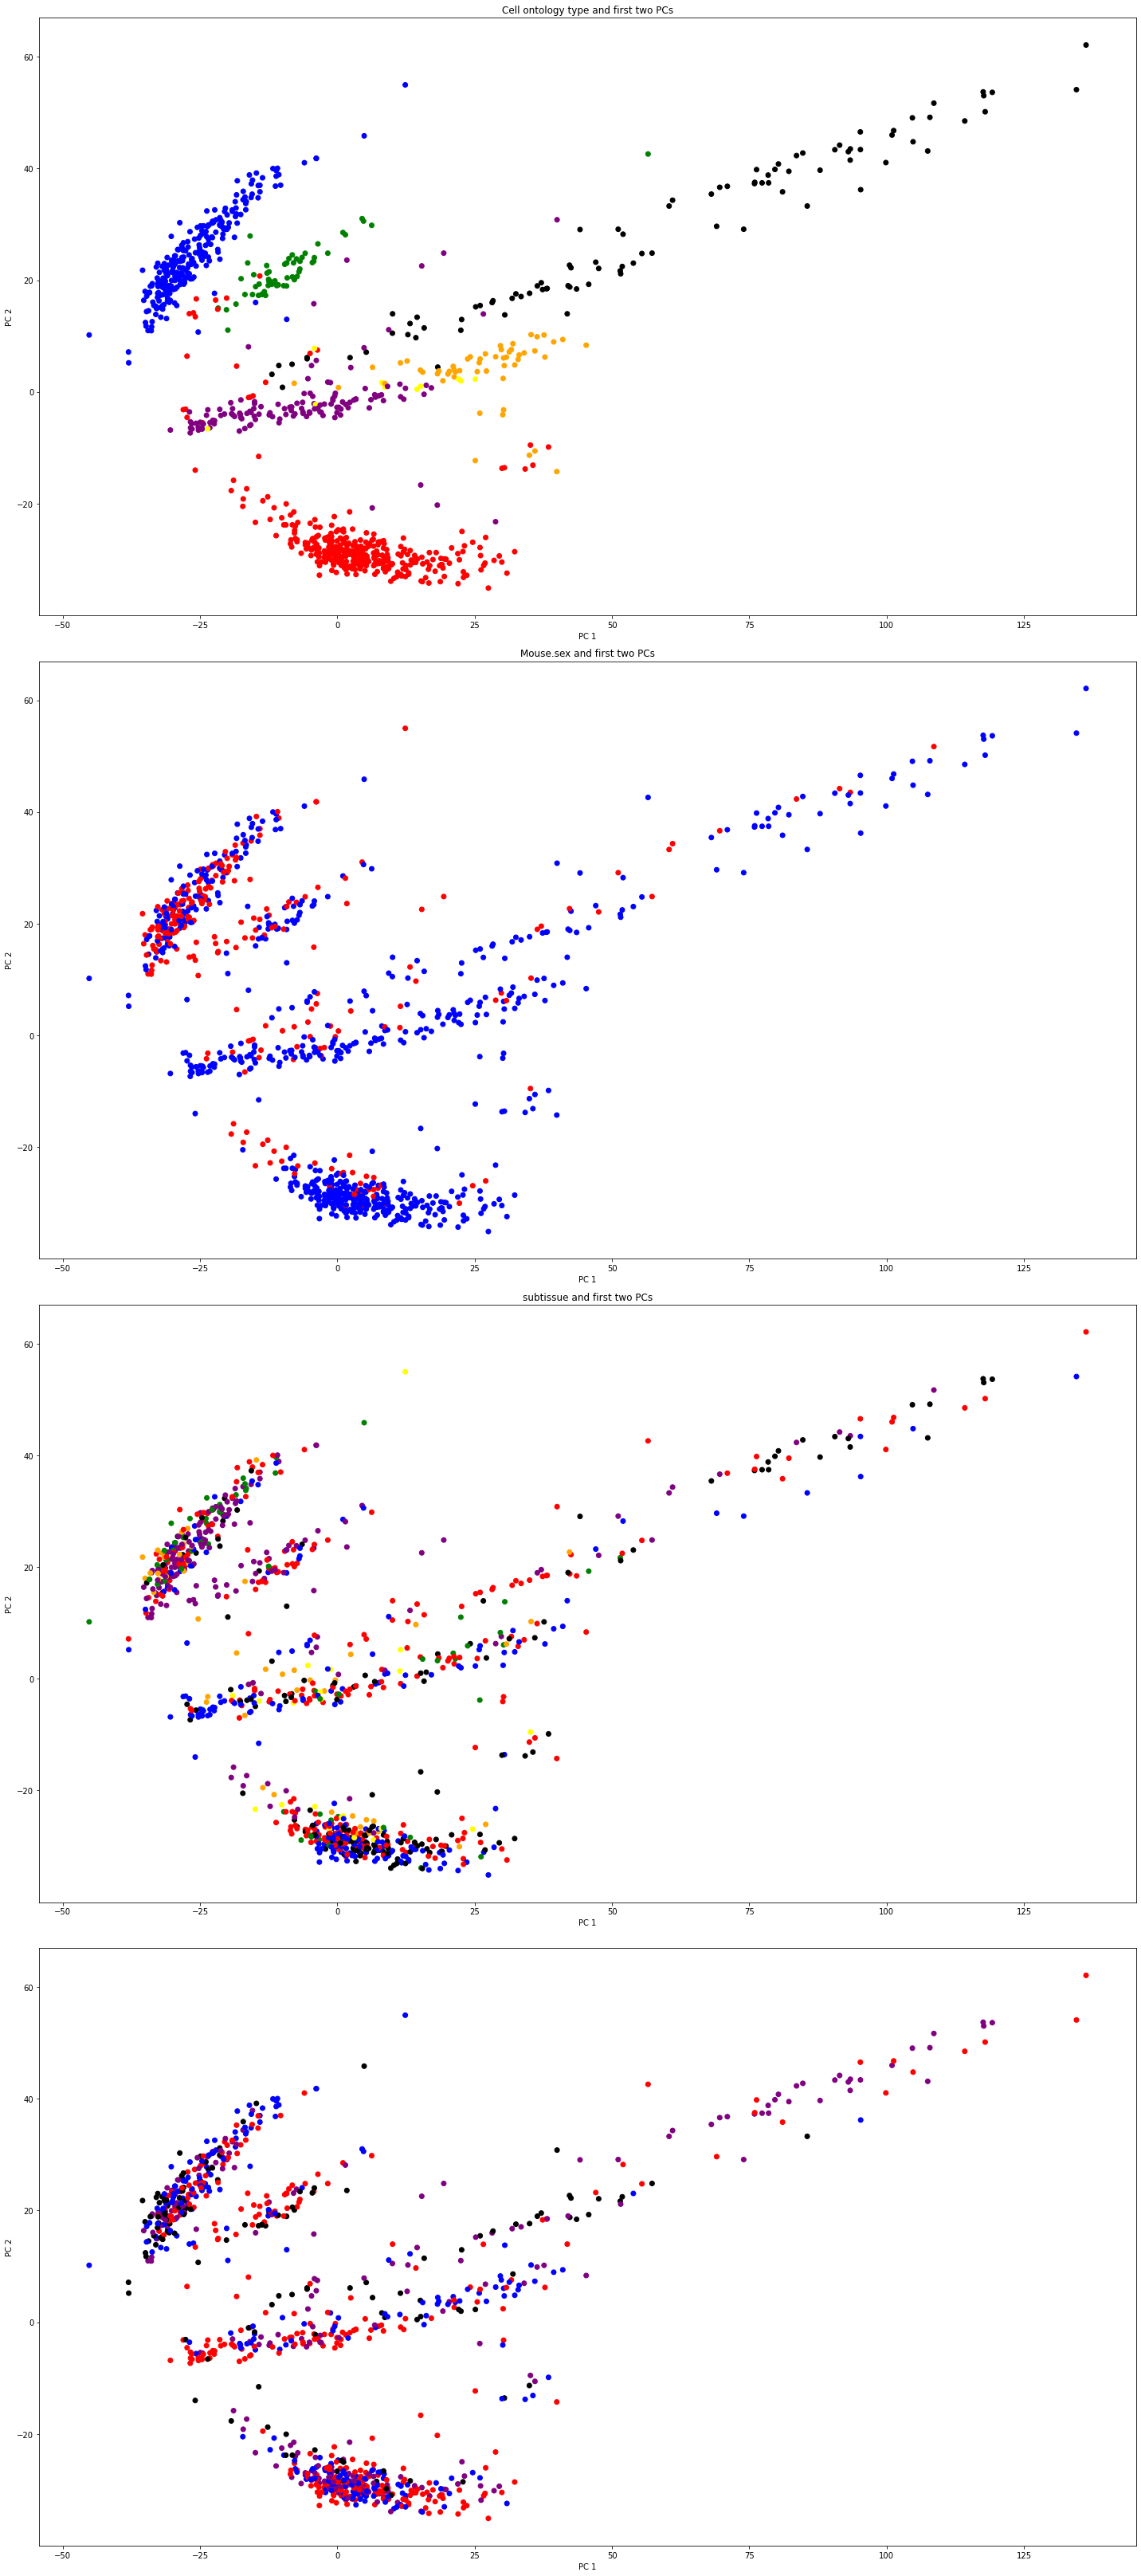

In [166]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(20,45))
cell_ontology_colors = ['red', 'blue', 'yellow', 'purple', 'black', 'green', 'orange']
cell_ontology_colors_map = {
  "oligodendrocyte": "red",
  "endothelial cell": "blue",
  "astrocyte": "purple",
  "neuron": "black",
  "brain pericyte": "green",
  "oligodendrocyte precursor cell": "orange",
  "Bergmann glial cell": "yellow",
}

mouse_sex_colors_map = {
  "F": "red",
  "M": "blue"
}

mouse_id_colors_map = {
  "3_10_M": "red",
  "3_9_M": "blue",
  "3_38_F": "purple",
  "3_8_M": "black",
  "3_11_M": "green",
  "3_39_F": "orange",
  "3_56_F": "yellow",
}

cell_subtissue_colors_map = {
  "Cortex": "red",
  "Hippocampus": "blue",
  "Striatum": "purple",
  "Cerebellum": "black",
}

cell_metadata_df['ontology_color'] = cell_metadata_df.apply(lambda row : cell_ontology_colors_map[row['cell_ontology_class']],axis=1)
cell_metadata_df['sex_color'] = cell_metadata_df.apply(lambda row : mouse_sex_colors_map[row['mouse.sex']],axis=1)
cell_metadata_df['id_color'] = cell_metadata_df.apply(lambda row : mouse_id_colors_map[row['mouse.id']],axis=1)
cell_metadata_df['subtissue_color'] = cell_metadata_df.apply(lambda row : cell_subtissue_colors_map[row['subtissue']],axis=1)

ax1.scatter(x=principalDf[0], y=principalDf[1], c=cell_metadata_df['ontology_color'])
ax1.set_xlabel("PC 1")
ax1.set_ylabel("PC 2")
ax1.set_title("Cell ontology type and first two PCs")
ax2.scatter(x=principalDf[0], y=principalDf[1], c=cell_metadata_df['sex_color'])
ax2.set_xlabel("PC 1")
ax2.set_ylabel("PC 2")
ax2.set_title("Mouse.sex and first two PCs")
ax3.scatter(x=principalDf[0], y=principalDf[1], c=cell_metadata_df['id_color'])
ax3.set_xlabel("PC 1")
ax3.set_ylabel("PC 2")
ax3.set_title("Mouse.id and first two PCs")
ax4.scatter(x=principalDf[0], y=principalDf[1], c=cell_metadata_df['subtissue_color'])
ax4.set_xlabel("PC 1")
ax4.set_ylabel("PC 2")
ax3.set_title("subtissue and first two PCs")


fig.tight_layout()


#plt.xlabel("PC 1")
#plt.ylabel("PC 2")



# **Based on the plots above, the first two principal components correspond to which aspect of the cells? What is the intrinsic dimension that they are describing?**

In [167]:
#PC1 and PC2 are able to distinguish well between cell ontology type 
#and M vs Female best, so I think that these two components correpond to 
#these aspects of the cells




## Part 2: K-means

While the annotations provide high-level information on cell type (e.g. cell_ontology_class has 7 categories), we may also be interested in finding more granular subtypes of cells. To achieve this, we will use K-means clustering to find a large number of clusters in the gene expression dataset. Note that the original gene expression matrix had over 18,000 noisy features, which is not ideal for clustering. So, we will perform K-means clustering on the first 20 principal components of the dataset.

**Implement a `kmeans` function which takes in a dataset `X` and a number of clusters `k`, and returns the cluster assignment for each point in `X`. You may NOT use sklearn for this implementation. Use lecture 6, slide 14 as a reference.**

In [133]:
import random
from scipy.spatial import distance

def kmeans(X, k, iters=10):
    '''Groups the points in X into k clusters using the K-means algorithm.

    Parameters
    ----------
    X : (m x n) data matrix
    k: number of clusters
    iters: number of iterations to run k-means loop

    Returns
    -------
    y: (m x 1) cluster assignment for each point in X
    '''
    #random var between min and max of each col
    #k_vals: (k x n)
    

    #print(n)
    #should be 20 

    
    #k_vals = np.zeros((k, n))
    #for i in range(0, k):
    #    for j in range (0, n):
    #        min_val_col = int(round(np.min(X[:, j])))
    #        max_val_col = int(round(np.max(X[:, j])))
    #        k_vals[i][j] = random.randint(min_val_col, max_val_col)
            
    count = 0  
    m = len(X)
    idx = np.random.choice(m, k, replace=False)
    n = len(X[0])
    centroids = X[idx, :]
    distances = distance.cdist(X, centroids, 'euclidean')
    min_ks = np.array([np.argmin(i) for i in distances])
    
    while count < iters: 
        centroids = []
        for idx in range(k):
            centroids.append(X[min_ks==idx].mean(axis=0))

        centroids = np.vstack(centroids)
        distances = distance.cdist(X, centroids ,'euclidean')
        min_ks = np.array([np.argmin(i) for i in distances])
        
        count = count +1
        
    return min_ks
    
    

Before applying K-means on the gene expression data, we will test it on the following synthetic dataset to make sure that the implementation is working.

Text(0, 0.5, '$x_2$')

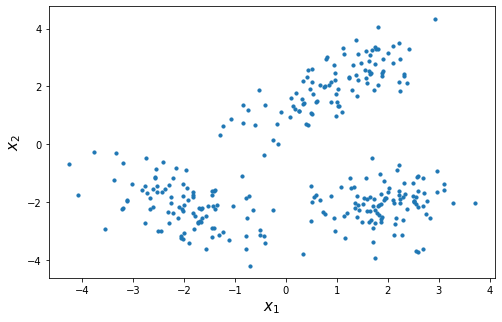

In [134]:
np.random.seed(0)
x_1 = np.random.multivariate_normal(mean=[1, 2], cov=np.array([[0.8, 0.6], [0.6, 0.8]]), size=100)
x_2 = np.random.multivariate_normal(mean=[-2, -2], cov=np.array([[0.8, -0.4], [-0.4, 0.8]]), size=100)
x_3 = np.random.multivariate_normal(mean=[2, -2], cov=np.array([[0.4, 0], [0, 0.4]]), size=100)
X = np.vstack([x_1, x_2, x_3])
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)

**Apply K-means with k=3 to the synthetic dataset above. Plot the points colored by their K-means cluster assignments to verify that your implementation is working.**

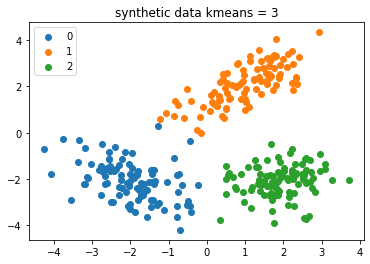

In [168]:
label = kmeans(X, 3, 25)

for i in np.unique(label):
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.title('synthetic data kmeans = 3')
plt.show()

**Use K-means with k=20 to cluster the first 20 principal components of the gene expression data.**

In [145]:
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(cell_gene_counts_df)
principalDf_20 = pd.DataFrame(data = principalComponents)

principalDf_20.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,15.353967,22.551441,28.909571,18.160755,-63.669943,63.397297,22.120444,193.167733,5.077884,-12.100376,-6.758110,-10.358490,-3.755730,7.438427,29.308156,-84.003145,-35.681221,13.889367,62.194364,-130.129131
1,-19.092789,-3.011189,37.073016,-7.781963,-0.324305,-5.521003,1.450280,-0.053563,-2.177564,3.883120,3.891003,-1.155627,-5.812673,2.205058,6.302601,1.432603,3.881123,0.378813,0.555073,-0.268533
2,1.624026,-26.093832,-8.735882,1.431625,3.908805,-0.872093,-2.047048,2.420191,3.514790,3.971356,0.178252,-0.661334,-4.580315,0.308893,2.742537,0.248268,3.238807,-0.359828,0.600396,0.276971
3,-15.469770,37.906453,-37.408305,5.952021,-10.229874,4.293272,15.286185,-4.262494,-6.747818,6.368063,-0.887716,3.891152,-1.964243,6.794700,4.331403,-0.102286,-0.780197,-3.228944,-1.402015,-1.675241
4,-15.223271,-2.999145,38.531674,-6.379686,-6.113615,-4.637031,5.044940,-2.089725,-6.841638,3.253985,6.326155,4.268258,2.162553,-1.078739,-0.829351,0.253314,-1.362130,0.031677,0.866694,-1.083264


In [148]:
principalDf_20_numpy = principalDf_20.to_numpy()

pca_labels = kmeans(principalDf_20_numpy, 20, 15)


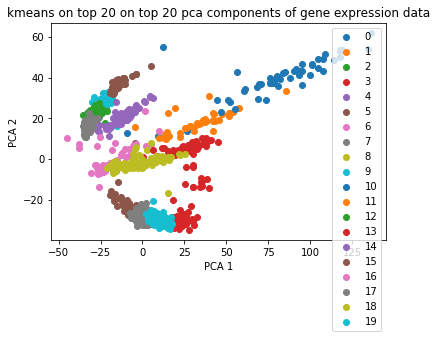

In [150]:
for i in np.unique(pca_labels):
    plt.scatter(principalDf_20_numpy[pca_labels == i , 0] , principalDf_20_numpy[pca_labels == i , 1] , label = i)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('kmeans on top 20 on top 20 pca components of gene expression data')
plt.legend()
plt.show()

## Part 3: t-SNE

In this final section, we will visualize the data again using t-SNE - a non-linear dimensionality reduction algorithm. You can learn more about t-SNE in this interactive tutorial: https://distill.pub/2016/misread-tsne/.

**Use t-SNE to reduce the first 20 principal components of the gene expression dataset to two dimensions. You may use `sklearn.manifold.TSNE`.** Note that it is recommended to first perform PCA before applying t-SNE to suppress noise and speed up computation.

In [113]:
tsne = TSNE()
tsne_pca_results = tsne.fit_transform(principalDf_20)


**Plot the data (first 20 principal components) projected onto the first two t-SNE dimensions.**

Text(0.5, 1.0, 'TSNE1 and TSNE2 for PCA20 dimensions from gene expression data')

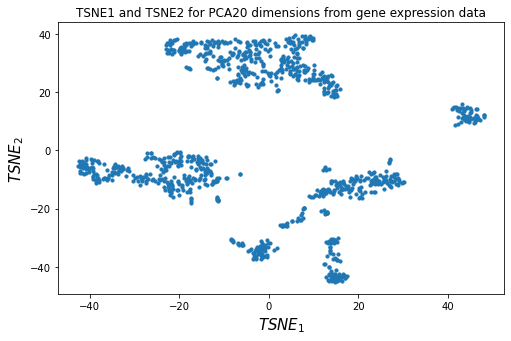

In [169]:
plt.figure(figsize=(8, 5))
plt.scatter(tsne_pca_results[:, 0], tsne_pca_results[:, 1], s=10)
plt.xlabel('$TSNE_1$', fontsize=15)
plt.ylabel('$TSNE_2$', fontsize=15)
plt.title('TSNE1 and TSNE2 for PCA20 dimensions from gene expression data')

**Plot the data (first 20 principal components) projected onto the first two t-SNE dimensions, with points colored by their cluster assignments from part 2.**

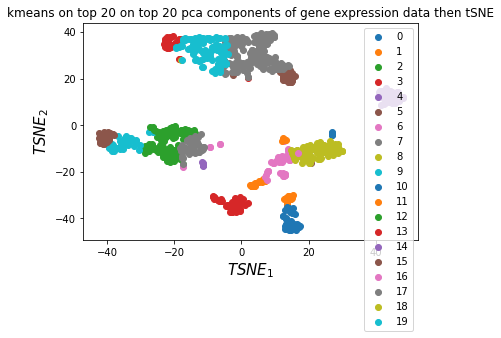

In [170]:
for i in np.unique(pca_labels):
    plt.scatter(tsne_pca_results[pca_labels == i , 0] , tsne_pca_results[pca_labels == i , 1] , label = i)
plt.xlabel('$TSNE_1$', fontsize=15)
plt.ylabel('$TSNE_2$', fontsize=15)
plt.title('kmeans on top 20 on top 20 pca components of gene expression data then tSNE')
plt.legend()
plt.show()

**Why is there overlap between points in different clusters in the t-SNE plot above?**

In [19]:
### There is overlap because we are reducing an already reduced dimensionality of PCA further, so we 
### are unable to see the 'depth' or third/more dimensions which may be separating the dataset. Also, 
### tSNE is a probabilisitic algorithm so it's possible that the overlap is due to the probability based nature -
### which lends itself to non-clear cut /black and white slices.


These 20 clusters may correspond to various cell subtypes or cell states. They can be further investigated and mapped to known cell types based on their gene expressions (e.g. using the K-means cluster centers). The clusters may also be used in downstream analysis. For instance, we can monitor how the clusters evolve and interact with each other over time in response to a treatment.